# Обработка лабораторной работы № 1.1

In [44]:
# Импротируем необходимые функции
import numpy as np # работа с массивами и линейной алгеброй
import matplotlib.pyplot as plt # для отрисовки графиков
import pandas as pd # для чтения и работы с данными
from scipy.optimize import curve_fit # фитирующая процедура
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Калибровочная кривая
Построим калибровочную кривую $\lambda (\alpha)$:

In [130]:
calibr = pd.read_excel('grad.xlsx')

In [131]:
calibr.head()

,a,l
0,1840,5331
1,1848,5341
2,2148,5852
3,2164,5882
4,2196,5945


In [132]:
def draw_cal(df):
    x = df['a']
    y = df['l']
    plt.figure(figsize=(15,10))
    plt.plot(x, y, '-ok', label = 'Экспериментальные точки'.decode('utf-8'))
    plt.title('Калибровочная кривая'.decode('utf-8'), fontsize=16)
    plt.xlabel('$\\alpha$, $\degree$'.decode('utf-8'), fontsize=14)
    plt.ylabel('$\\lambda$, $\AA$'.decode('utf-8'), fontsize=14)
    plt.legend()
    plt.grid()
    plt.show()

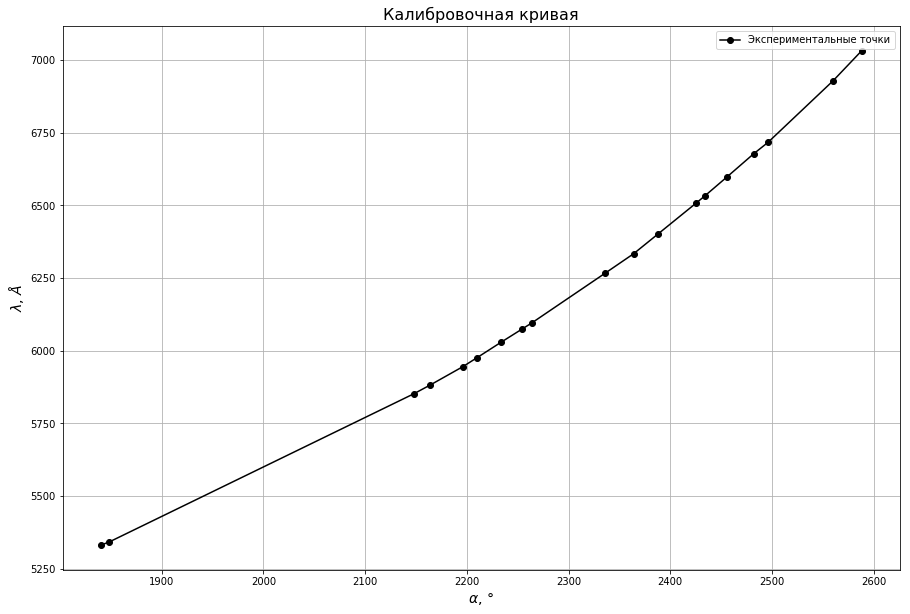

In [133]:
draw_cal(calibr)

Было найдено, что максимальный фототок наблюдается при $\alpha = 2524$.

## Зависимость фототока от напряжения
Для начала построим зависимость фототока от напряжения на фотоэлементе. Т.к. нам известно только напряжение, которое пропорционально силе фототока, получим зависимость фототока от напряжения на фотоэлементе с точностью до коэффициента по оси $Y$.

In [134]:
data1840 = pd.read_excel('a1840.xlsx')
data2196 = pd.read_excel('a2196.xlsx')
data2254 = pd.read_excel('a2254.xlsx')
data2364 = pd.read_excel('a2364.xlsx')
data2434 = pd.read_excel('a2434.xlsx')
data2588 = pd.read_excel('a2588.xlsx')

data = [data1840, data2196, data2254, data2364, data2434, data2588]
data_names = [5331, 5945, 6074, 6334, 6533, 7032]

In [143]:
def draw_V_V(data, data_names):
    plt.figure(figsize=(15,10))
    i = 0
    color = ['red', 'black', 'blue', 'brown', 'green', 'orange']
    for df in data:
        x = df['V_f_el']
        y = df['V_I']
        plt.plot(x, y, '-ok', color = color[i], label = ('Экспериментальные точки, $\lambda$ = ' + str(data_names[i]) + str(' $\AA$')).decode('utf-8'))
        i += 1
    
    plt.title('Вольтамперная характеристика'.decode('utf-8'), fontsize=16)
    plt.xlabel('$V_{фотокатод}$, В'.decode('utf-8'), fontsize=14)
    plt.ylabel('$V_{фототок}$, В'.decode('utf-8'), fontsize=14)
    plt.legend()
    plt.grid()
    plt.show()


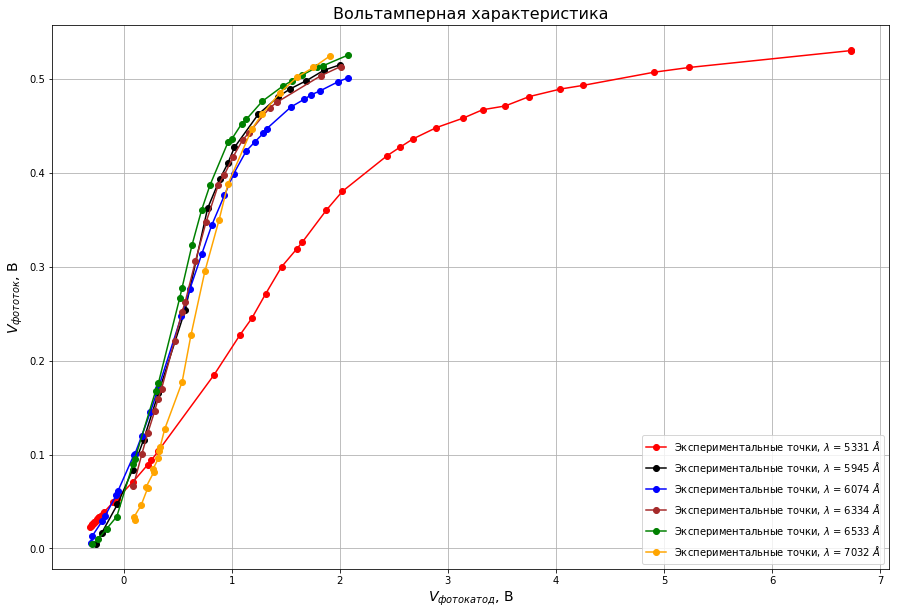

In [144]:
draw_V_V(data, data_names)

Построим каждый график отдельно в координатах ($\sqrt I$, $V$).

In [145]:
def draw_sqrt(df):
    x = np.sqrt(df['V_I'])
    y = df['V_f_el']
    
    plt.figure(figsize=(15,10))
    plt.plot(x, y, '-ok', label = 'Экспериментальные точки'.decode('utf-8'))
    #plt.title('Калибровочная кривая'.decode('utf-8'), fontsize=16)
    plt.xlabel('$\\alpha$, $\degree$'.decode('utf-8'), fontsize=14)
    plt.ylabel('$\\lambda$, $\AA$'.decode('utf-8'), fontsize=14)
    plt.legend()
    plt.grid()
    plt.show()

In [149]:
from IPython.display import HTML
HTML('<iframe src=./5331.pdf width=900 height=800></iframe>')

In [150]:
HTML('<iframe src=./5945.pdf width=900 height=800></iframe>')

In [151]:
HTML('<iframe src=./6074.pdf width=900 height=800></iframe>')

In [152]:
HTML('<iframe src=./6334.pdf width=900 height=800></iframe>')

In [153]:
HTML('<iframe src=./6533.pdf width=900 height=800></iframe>')

In [154]:
HTML('<iframe src=./7032.pdf width=900 height=800></iframe>')

Таким образом, получили напряжения запирания. Вот они

In [168]:
data_zap = pd.read_excel('zap.xlsx')
data_zap.loc[0:7, "l":"V_z"]

,l,V_z
0,5331,-1.03645
1,5945,-0.46178
2,6074,-0.57164
3,6334,-0.54439
4,6533,-0.43372
5,7032,-0.26668


Теперь построим график $V_z(\omega)$ и найдем постоянную Планка

In [169]:
HTML('<iframe src=./h.pdf width=900 height=800></iframe>')

Из МНК
$$
\hbar = (1.45\pm0.05)\cdot 10^{-34} \text{ Дж$\cdot$ с}\\
\hbar_{табл} = 1.054\cdot 10^{-34} \text{ Дж$\cdot$ с}
$$